In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#1.Load and Display Data
# Read the CSV file house_price.csv
df = pd.read_csv('./data/house_price.csv')

In [8]:
df.head()

,bedrooms,sq_meter,neighborhood,sales_price
0,3,200,Normalville,250000
1,2,80,Cool Town,300000
2,2,85,Normalville,150000
3,1,55,Normalville,78000
4,4,200,Skid Row,150000


In [9]:
#1.1 Load and Display Data
# display the first 2 rows.
df.head(2)

,bedrooms,sq_meter,neighborhood,sales_price
0,3,200,Normalville,250000
1,2,80,Cool Town,300000


In [10]:
#2. Show Statistical Summary
# Display a statistical summary of the dataset to see the mean, standard
#deviation, minimum and maximum values, etc.

df.describe()
df.info() #not this one 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   bedrooms      5 non-null      int64 
 1   sq_meter      5 non-null      int64 
 2   neighborhood  5 non-null      object
 3   sales_price   5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


In [11]:
#3. Filter Data
# Filter the dataset to show only houses with more than 2 bedrooms.
df_filtered = df[df['bedrooms'] > 2]

df_filtered

,bedrooms,sq_meter,neighborhood,sales_price
0,3,200,Normalville,250000
4,4,200,Skid Row,150000


In [ ]:
#4. Sort Data
# Sort the dataset based on the sales price in ascending order 升序
df_sorted = df.sort_values('sales_price') #ascending=True
df_sorted #[['bedrooms', 'sq_meter','neighborhood', 'sales_price']]


,bedrooms,sq_meter,neighborhood,sales_price
3,1,55,Normalville,78000
2,2,85,Normalville,150000
4,4,200,Skid Row,150000
0,3,200,Normalville,250000
1,2,80,Cool Town,300000


In [13]:
#5. Calculate Average Sales Price
# Calculate the average sales price for all houses.
avg_price = df['sales_price'].mean()
avg_price

np.float64(185600.0)

In [ ]:
#6. Add a New Column
# Add a new column that shows the price per square meter.
#meters=price/sq-meters
df['price_per_sq_meter'] = df['sales_price'] / df['sq_meter']
df #[['sales_price','sq_meter','price_per_sq_meter']].head()

,bedrooms,sq_meter,neighborhood,sales_price,price_per_sq_meter
0,3,200,Normalville,250000,1250.000000
1,2,80,Cool Town,300000,3750.000000
2,2,85,Normalville,150000,1764.705882
3,1,55,Normalville,78000,1418.181818
4,4,200,Skid Row,150000,750.000000


In [ ]:
#7. Group Data
# Group the dataset by neighborhood and calculate the average sales price for
#each neighborhood.

#step 1 group by neighborhood:
de_grouped = df.groupby('neighborhood')

#step2 calculate the average sales price for each neighborhood.
df_grouped = df.groupby('neighborhood')['sales_price'].mean()
df_grouped

#step3 add function 老师加了这个
df_grouped = df.groupby('neighborhood')['sales_price'].mean().reset_index()
df_grouped


,neighborhood,sales_price
0,Cool Town,300000.000000
1,Normalville,159333.333333
2,Skid Row,150000.000000


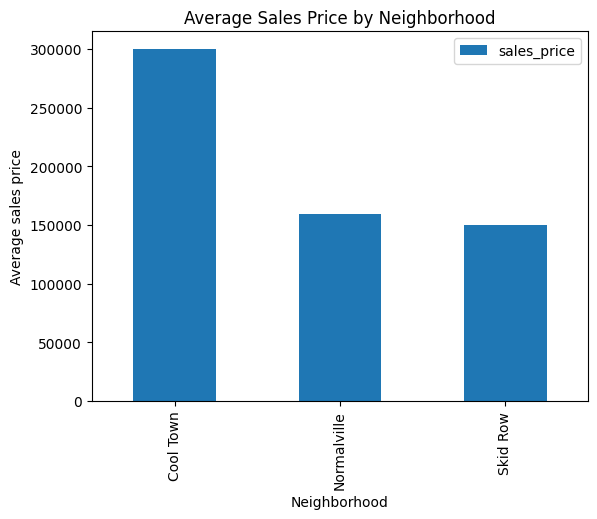

In [18]:
#8. Visualize Data
# Create a simple bar plot that shows the average sales price per neighborhood
#terminal: pip install matplotib 
import matplotlib.pyplot as plt 
df_grouped = df.groupby('neighborhood')['sales_price'].mean().reset_index()

df_grouped.plot(kind='bar',x='neighborhood',y='sales_price')

plt.title('Average Sales Price by Neighborhood')

plt.xlabel('Neighborhood')

plt.ylabel('Average sales price')

plt.show()

In [ ]:
#9. Find Maximum Values
# Find the house with the highest sales price.

max_price = df[df['sales_price'] == df['sales_price'].max()]
max_price

,bedrooms,sq_meter,neighborhood,sales_price,price_per_sq_meter
1,2,80,Cool Town,300000,3750.0


In [24]:
#10. Export Data
# Export the manipulated DataFrame to a new CSV file.
df

df.to_csv('./data/house_price_pricessed.csv', index=False)